In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import kagglehub
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [2]:


# Download latest version
path = kagglehub.dataset_download("govindaramsriram/energy-consumption-dataset-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ibuko\.cache\kagglehub\datasets\govindaramsriram\energy-consumption-dataset-linear-regression\versions\1


In [3]:
test_data = pd.read_csv(path+'//test_energy_data.csv')
train_data = pd.read_csv(path+'//train_energy_data.csv')



In [4]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.8 KB


In [5]:
print(len(train_data['Building Type']))
train_data.nunique()

1000


Building Type             3
Square Footage          986
Number of Occupants      99
Appliances Used          49
Average Temperature     833
Day of Week               2
Energy Consumption     1000
dtype: int64

In [6]:
train_data['Building Type'].value_counts()

Building Type
Residential    347
Commercial     336
Industrial     317
Name: count, dtype: int64

In [7]:
train_data['Building Type'] = train_data['Building Type'].astype('category')

In [8]:
train_data['Day of Week'].value_counts()

Day of Week
Weekday    507
Weekend    493
Name: count, dtype: int64

In [9]:
train_data['Day of Week'] = train_data['Day of Week'].astype('category')

In [10]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Building Type        1000 non-null   category
 1   Square Footage       1000 non-null   int64   
 2   Number of Occupants  1000 non-null   int64   
 3   Appliances Used      1000 non-null   int64   
 4   Average Temperature  1000 non-null   float64 
 5   Day of Week          1000 non-null   category
 6   Energy Consumption   1000 non-null   float64 
dtypes: category(2), float64(2), int64(3)
memory usage: 41.6 KB


In [11]:
train_data.sample(10)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
540,Commercial,29035,5,34,19.77,Weekday,4132.91
230,Industrial,24660,32,5,23.67,Weekend,4034.64
929,Residential,32913,21,8,13.77,Weekday,3496.82
91,Commercial,16434,24,24,17.95,Weekday,3501.94
455,Residential,27924,85,7,17.39,Weekend,3799.24
299,Residential,42255,78,47,27.14,Weekday,5247.04
325,Industrial,35388,13,49,15.09,Weekday,5353.94
938,Commercial,27157,67,38,21.08,Weekend,4682.44
279,Residential,26010,7,36,31.06,Weekend,3435.21
398,Residential,45465,3,25,10.42,Weekend,4251.16


In [12]:
#I had to change square footage to square meters because it's more transparent for me
train_data.sample(10)
train_data['Square Footage'] = train_data['Square Footage']*(0.09290304)




In [13]:
train_data.rename(columns={'Square Footage':'Square meters'},inplace=True)

In [14]:
train_data.sample(10)

,Building Type,Square meters,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
104,Industrial,91.137882,3,12,28.85,Weekday,2724.82
256,Industrial,2980.794038,38,31,16.00,Weekday,5074.24
437,Industrial,1656.832815,66,19,23.56,Weekday,4363.89
670,Commercial,2049.719772,92,8,33.62,Weekend,4015.07
303,Commercial,2733.300340,16,21,34.73,Weekday,3927.40
232,Commercial,2283.278014,86,24,24.53,Weekend,4446.22
111,Residential,2067.464252,10,17,24.49,Weekday,2980.23
338,Industrial,4535.526413,51,35,30.75,Weekday,6047.23
388,Residential,749.170115,90,12,20.83,Weekday,2989.05
932,Commercial,3916.048942,47,21,27.70,Weekend,4859.08


In [15]:
train_data.columns

Index(['Building Type', 'Square meters', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

This part is for exploring some dependencies, just for fun, then I will start building real linear regression model

In [16]:
NumOfOcupantsList = np.array(train_data['Number of Occupants'])
BuildingTypeList = np.array(train_data['Building Type'])
AreaList = np.array(train_data['Square meters'])
ApplienceList = np.array(train_data['Appliances Used'])
TemperatureList = np.array(train_data['Average Temperature'])
DaysList=np.array(train_data['Day of Week'])
ConsumptionList = np.array(train_data['Energy Consumption'])


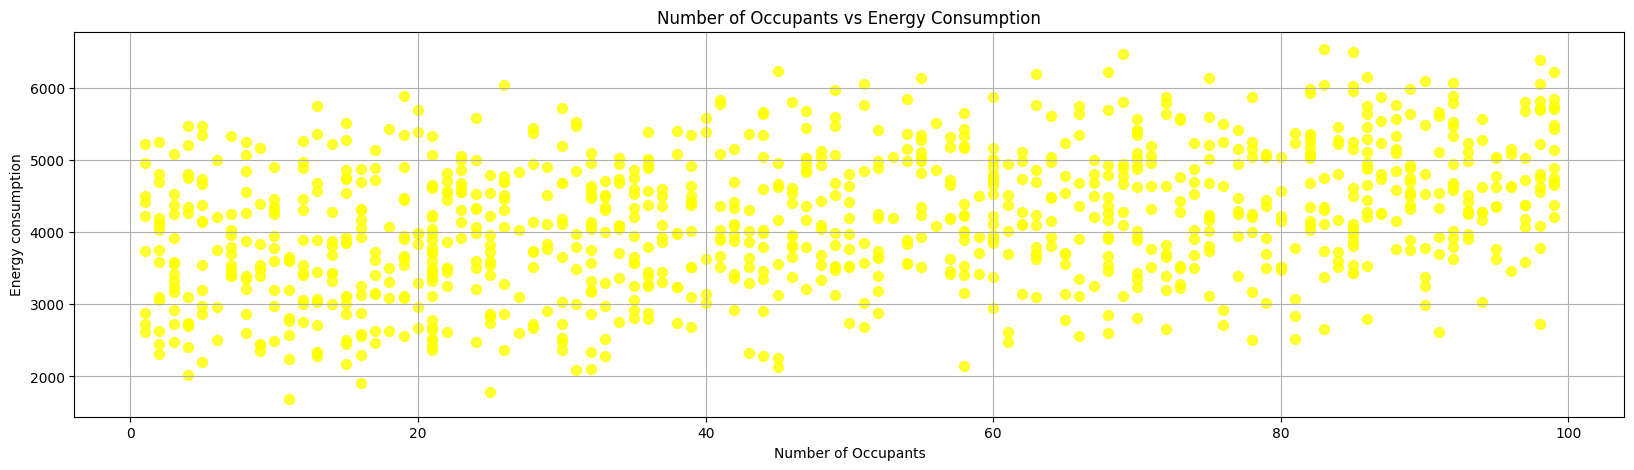

In [17]:
plt.figure(figsize = (20,5))
plt.scatter(NumOfOcupantsList,ConsumptionList,color='yellow',s=50,alpha=0.8)
plt.xlabel('Number of Occupants')
plt.ylabel('Energy consumption')
plt.title('Number of Occupants vs Energy Consumption')
plt.grid(True)
plt.show()

In [18]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Building Type        1000 non-null   category
 1   Square meters        1000 non-null   float64 
 2   Number of Occupants  1000 non-null   int64   
 3   Appliances Used      1000 non-null   int64   
 4   Average Temperature  1000 non-null   float64 
 5   Day of Week          1000 non-null   category
 6   Energy Consumption   1000 non-null   float64 
dtypes: category(2), float64(3), int64(2)
memory usage: 41.6 KB


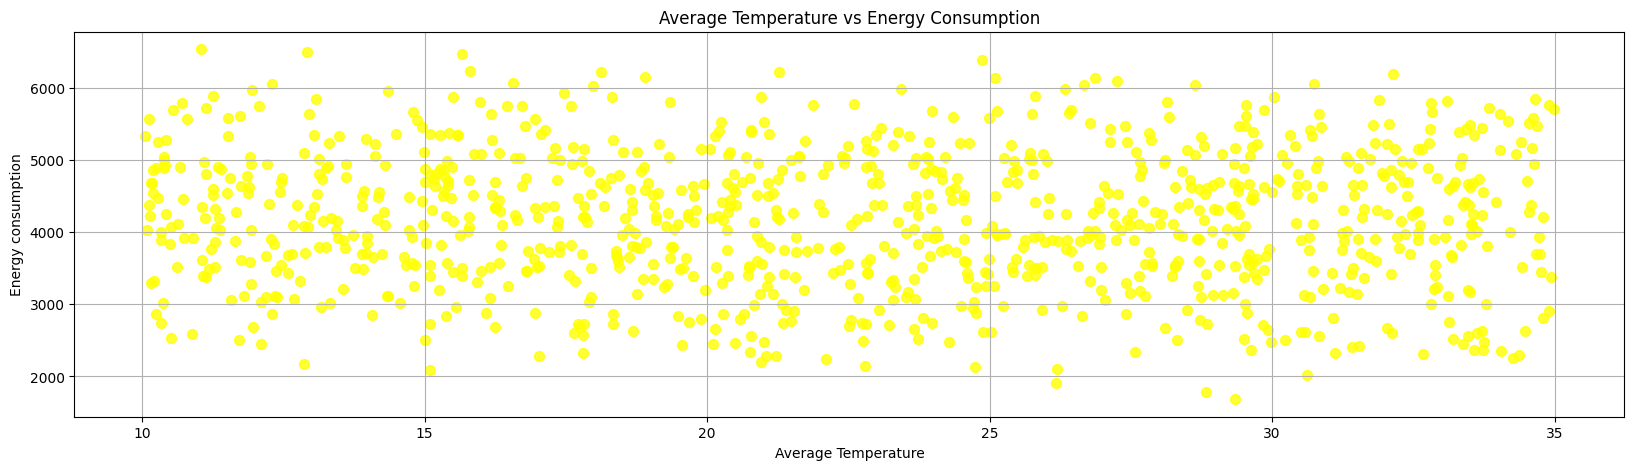

In [19]:
plt.figure(figsize = (20,5))
plt.scatter(TemperatureList,ConsumptionList,color='yellow',s=50,alpha=0.8)
plt.xlabel('Average Temperature')
plt.ylabel('Energy consumption')
plt.title('Average Temperature vs Energy Consumption')
plt.grid(True)
plt.show()

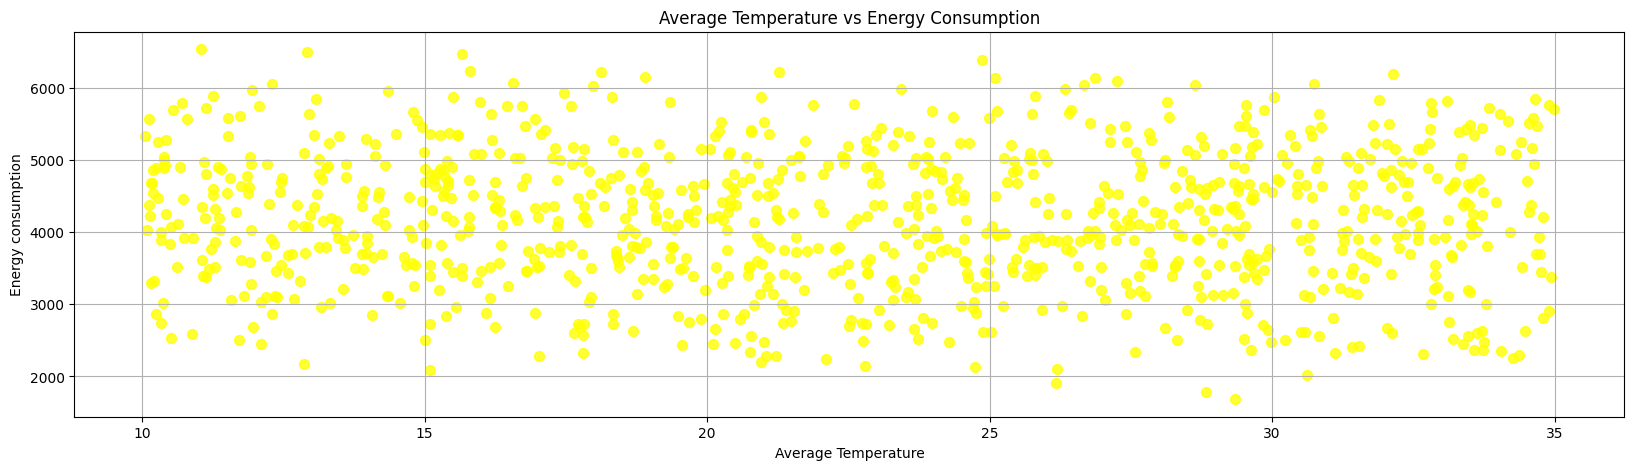

In [20]:
plt.figure(figsize = (20,5))
plt.scatter(TemperatureList,ConsumptionList,color='yellow',s=50,alpha=0.8)
plt.xlabel('Average Temperature')
plt.ylabel('Energy consumption')
plt.title('Average Temperature vs Energy Consumption')
plt.grid(True)
plt.show()

In [21]:
train_data

,Building Type,Square meters,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,656.174172,76,10,29.84,Weekday,2713.95
1,Commercial,4122.293691,66,45,16.72,Weekday,5744.99
2,Industrial,1788.848035,37,17,14.30,Weekend,4101.24
3,Residential,1232.358826,14,41,32.82,Weekday,3009.14
4,Commercial,1242.578160,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,1339.568934,68,44,23.95,Weekend,3661.21
996,Industrial,1132.859670,7,22,14.67,Weekend,3546.34
997,Commercial,3675.430068,88,20,32.18,Weekday,5147.21
998,Residential,775.554578,67,37,16.48,Weekend,3244.98


In [22]:
residentials = train_data[train_data['Building Type'] == 'Residential']
residentials.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 998
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Building Type        347 non-null    category
 1   Square meters        347 non-null    float64 
 2   Number of Occupants  347 non-null    int64   
 3   Appliances Used      347 non-null    int64   
 4   Average Temperature  347 non-null    float64 
 5   Day of Week          347 non-null    category
 6   Energy Consumption   347 non-null    float64 
dtypes: category(2), float64(3), int64(2)
memory usage: 17.4 KB


In [23]:
residentials.sample(10)

,Building Type,Square meters,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
755,Residential,2451.897032,13,9,12.69,Weekend,3066.15
419,Residential,3629.257258,75,24,10.17,Weekday,4682.41
888,Residential,771.466844,98,46,18.82,Weekday,3771.12
107,Residential,2987.111445,75,24,33.11,Weekend,4172.08
64,Residential,894.377566,84,41,25.93,Weekend,3511.71
538,Residential,1747.599085,19,25,14.33,Weekday,3108.88
615,Residential,1012.178621,18,26,34.47,Weekday,2622.38
768,Residential,2236.176173,2,49,24.59,Weekend,3580.56
721,Residential,1600.254864,6,9,30.23,Weekday,2500.08
503,Residential,3009.129466,84,15,27.44,Weekday,4172.29


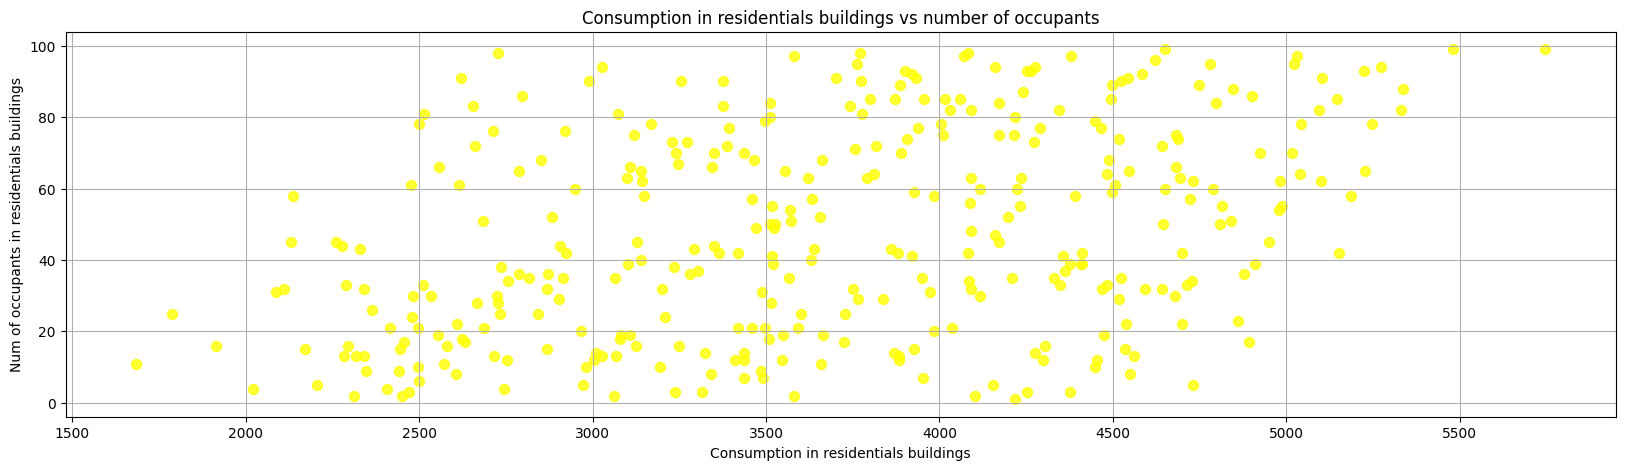

In [24]:
residentialsConsumption = np.array(residentials['Energy Consumption'])
residentialsOccupants = np.array(residentials['Number of Occupants'])
plt.figure(figsize = (20,5))
plt.scatter(residentialsConsumption,residentialsOccupants,color='yellow',s=50,alpha=0.8)
plt.xlabel('Consumption in residentials buildings')
plt.ylabel('Num of occupants in residentials buildings')
plt.title('Consumption in residentials buildings vs number of occupants')
plt.grid(True)
plt.show()

In [25]:
train_data.describe()


,Square meters,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2365.533251,48.372000,25.606000,22.611390,4166.252570
std,1328.007522,29.061972,14.105166,7.139943,933.313064
min,52.025702,1.000000,1.000000,10.050000,1683.950000
25%,1223.509811,22.000000,13.000000,16.475000,3509.482500
50%,2366.890750,47.000000,26.000000,22.815000,4175.730000
75%,3478.870462,73.250000,38.000000,28.850000,4863.850000
max,4644.873291,99.000000,49.000000,34.990000,6530.600000


In [26]:
std = np.std(train_data['Square meters']) # odchylenie
mu = np.mean(train_data['Square meters']) # srednia
x = np.linspace(mu-4*std,mu+4*std,100)
y = (1/(std*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/std)**2)

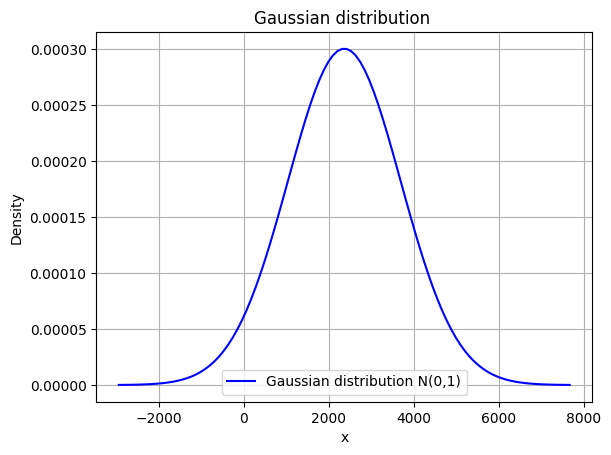

In [31]:
plt.plot(x, y, label='Gaussian distribution N(0,1)', color='blue')
plt.title('Gaussian distribution ')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


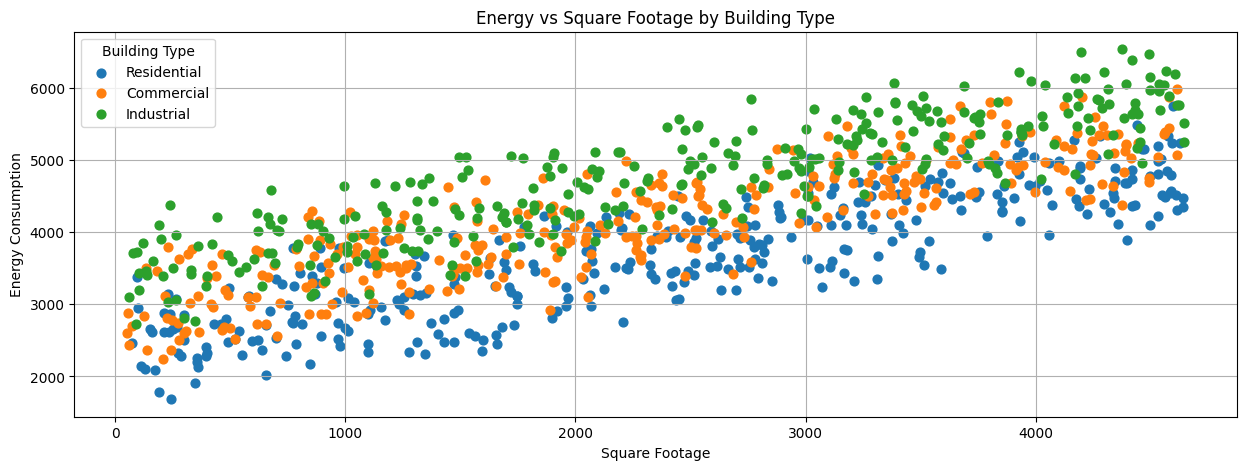

In [30]:
plt.figure(figsize = (15,5))
colors = plt.cm.tab10.colors
buildings = train_data['Building Type'].unique()
for i,b_type in enumerate(buildings):
    subset = train_data[train_data['Building Type'] == b_type]
    plt.scatter(
        subset['Square meters'],
        subset['Energy Consumption'],
        label=b_type,
        color=colors[i % len(colors)],
        alpha = 1,
        s=40
    )
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption')
plt.title('Energy vs Square Footage by Building Type')
plt.legend(title='Building Type')
plt.grid(True)
plt.show()

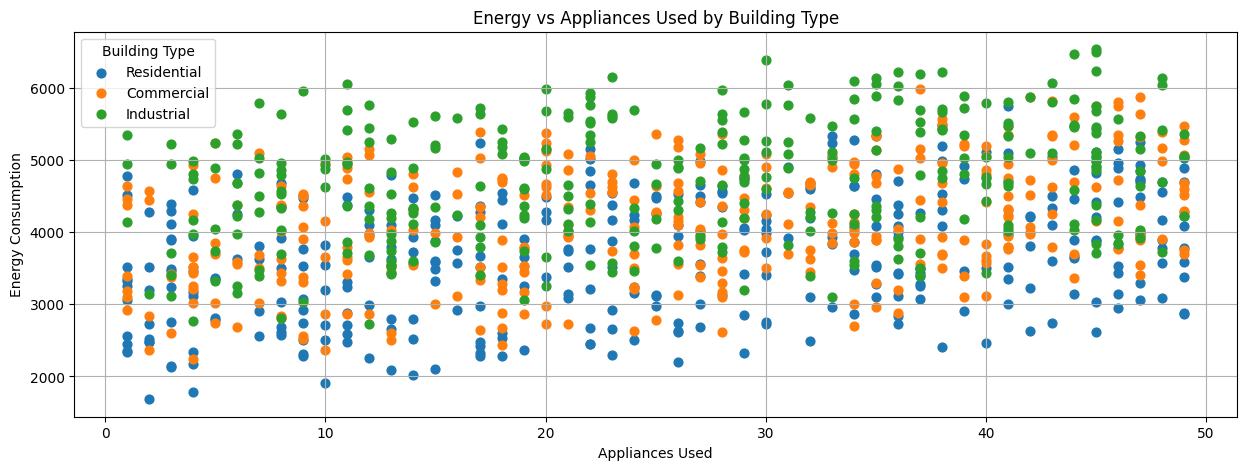

In [33]:
plt.figure(figsize = (15,5))
colors = plt.cm.tab10.colors
buildings = train_data['Building Type'].unique()
for i,b_type in enumerate(buildings):
    subset = train_data[train_data['Building Type'] == b_type]
    plt.scatter(
        subset['Appliances Used'],
        subset['Energy Consumption'],
        label=b_type,
        color=colors[i % len(colors)],
        alpha = 1,
        s=40
    )
plt.xlabel('Appliances Used')
plt.ylabel('Energy Consumption')
plt.title('Energy vs Appliances Used by Building Type')
plt.legend(title='Building Type')
plt.grid(True)
plt.show()

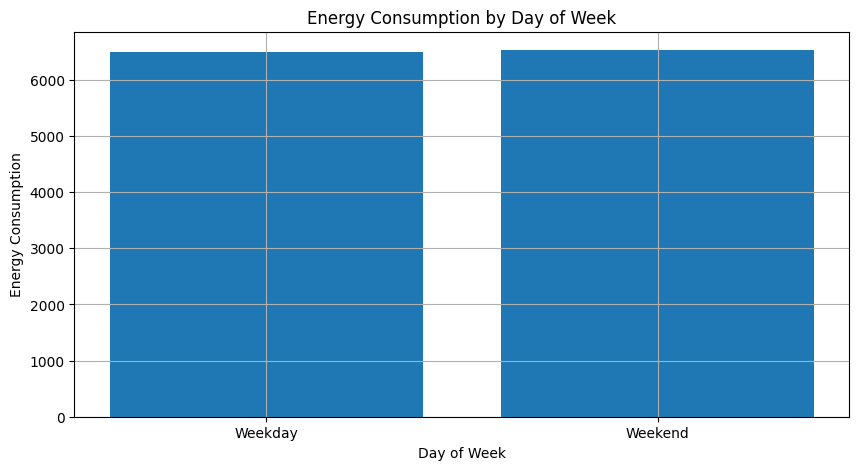

In [34]:
plt.figure(figsize = (10,5))
plt.bar(train_data['Day of Week'], train_data['Energy Consumption'])
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Day of Week')
plt.grid(True)
plt.show()

C:\Users\ibuko\AppData\Local\Temp\ipykernel_10184\2541193009.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = train_data.groupby('Building Type')['Energy Consumption'].mean()


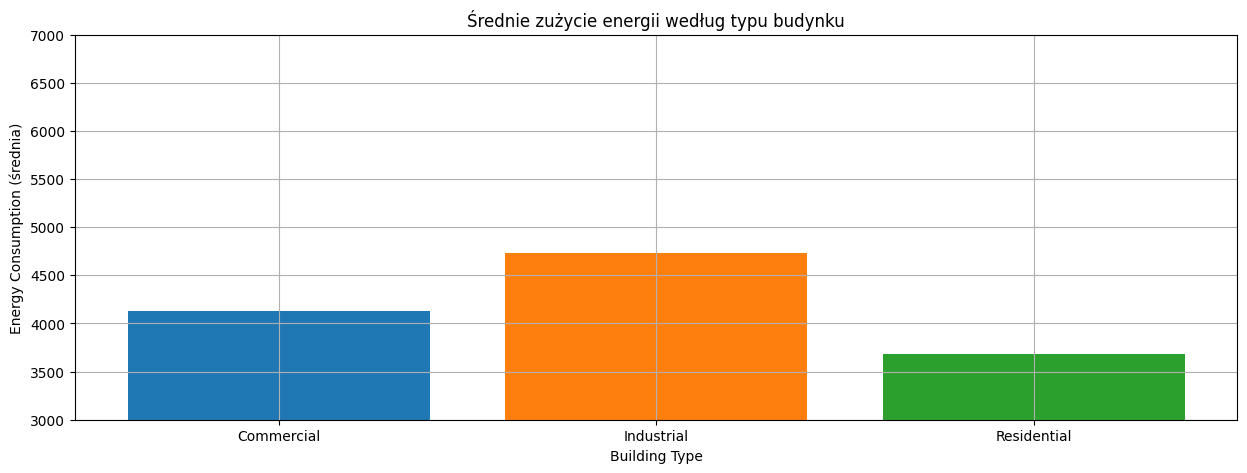

In [41]:
aggregated_data = train_data.groupby('Building Type')['Energy Consumption'].mean()
plt.figure(figsize=(15, 5))
colors = plt.cm.tab10.colors
plt.bar(aggregated_data.index, aggregated_data.values, color=colors[:len(aggregated_data)])
plt.ylim(3000, 7000)
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption (średnia)')
plt.title('Średnie zużycie energii według typu budynku')
plt.grid(True)
plt.show()

In [65]:
test_data['Square Footage'] = test_data['Square Footage']*(0.09290304)
test_data.rename(columns={'Square Footage':'Square meters'},inplace=True)

KeyError: 'Square Footage'

In [66]:
building_labels_encoder = LabelEncoder()
day_labels_encoder= LabelEncoder()

In [67]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

In [68]:
train_data_copy['Building Type Encoded'] = building_labels_encoder.fit_transform(train_data_copy['Building Type'])
test_data_copy['Building Type Encoded'] = building_labels_encoder.transform(test_data_copy['Building Type'])
train_data_copy['Day of Week Encoded'] = day_labels_encoder.fit_transform(train_data_copy['Day of Week'])
test_data_copy['Day of Week Encoded'] = day_labels_encoder.transform(test_data_copy['Day of Week'])

In [69]:
features = train_data_copy.columns.tolist()
features

['Building Type',
 'Square meters',
 'Number of Occupants',
 'Appliances Used',
 'Average Temperature',
 'Day of Week',
 'Energy Consumption',
 'Building Type Encoded',
 'Day of Week Encoded']

In [70]:
test_data_copy.columns.tolist()

['Building Type',
 'Square meters',
 'Number of Occupants',
 'Appliances Used',
 'Average Temperature',
 'Day of Week',
 'Energy Consumption',
 'Building Type Encoded',
 'Day of Week Encoded']

In [71]:
X_train = train_data_copy[features].values
y_train = train_data_copy['Energy Consumption'].values

X_test = test_data_copy[features].values
y_test = test_data_copy['Energy Consumption'].values

In [73]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1000, 9), (1000,), (100, 9), (100,))

Linear Regression made by myself

In [74]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
    def fit(self,X,y):
        X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
        self.weights = np.linalg.solve(X_with_bias.T @ X_with_bias,X_with_bias.T @ y)
        self.bias = self.weights[0]
        self.weights = self.weights[1:]

    def predict(self,X):
        return X @ self.weights + self.bias
    def get_params(self):
        return self.weights, self.bias

In [81]:
print(X_train.dtype)
print(y_train.dtype)
X_train

object
float64


array([['Residential', 656.1741715200001, 76, ..., 2713.95, 2, 0],
       ['Commercial', 4122.29369088, 66, ..., 5744.99, 0, 0],
       ['Industrial', 1788.8480352000001, 37, ..., 4101.24, 1, 1],
       ...,
       ['Commercial', 3675.43006848, 88, ..., 5147.21, 0, 0],
       ['Residential', 775.55457792, 67, ..., 3244.98, 2, 1],
       ['Commercial', 1469.07577152, 57, ..., 3423.63, 0, 1]],
      dtype=object)

In [75]:
manual_model = LinearRegression()
manual_model.fit(X_train,y_train)
y_pred_manual = manual_model.predict(X_test)

mse_manual = np.mean((y_test - y_pred_manual)**2)
rmse_manual = np.sqrt(mse_manual)
mae_manual = np.mean(np.abs(y_test - y_pred_manual))
r2_manual = 1-(np.sum((y_test-y_pred_manual)**2)/np.sum((y_test-np.mean(y_test))**2))

print(f"MSE (manual): {mse_manual:.2f}")
print(f"RMSE (manual): {rmse_manual:.2f}")
print(f"MAE (manual): {mae_manual:.2f}")
print(f"R² (manual): {r2_manual:.4f}")

TypeError: can't multiply sequence by non-int of type 'float'